In [8]:
from google.colab import files
files.upload()

Saving dataset1.csv to dataset1.csv


{'dataset1.csv': b'Company Name,PL_Net Sales,PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,2449.00,294.00,342.00,1.16,25.77,13.29,1.93,0.63,1.91,21.30,10.86,6.28,0.49\r\n3M India Ltd.,1087.00,93.00,106.00,1.14,23.55,35.88, -   ,2.08, -   ,14.17,8.31,17.49,2.32\r\nABB India Ltd.,6237.00,355.00,354.00,1.00,15.71,25.33, -   ,1.18,0.26,9.55,5.46,20.56,2.38\r\nAccelya Solutions India Ltd.,166.00,26.00,28.00,1.08,24.02,25.64,0.04,1.11,2.28,24.76,15.92,1.75,0.57\r\nAegis Logistics Ltd.,305.00,43.00,33.00,0.76,24.55,22.50,0.69,0.83,2.62,25.93,14.09,5.48,0.92\r\nAffle (India) Ltd.,6.00,0.00,#N/A,#N/A, -   ,1.95,-0.06,0.97, -   ,3.78,1.17, -   , -   \r\nAgro Tech Foods Ltd.,650.00,25.00,14.00,0.56,17.92,23.85, -   ,2.64,0.61,5.62,3.87,15.28,0.65\r\nAkzo Nobel India Ltd.,939.00,159.00,111.00,0.70,16.25,20.52, -   ,0.82,2.66,19.96,14.30,10.16,2.31\r\nAllsec Technologies Ltd.,135.00,-10.00,-7.00,0.69,-7.87,-7.32

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
data = pd.read_csv('dataset1.csv')

In [11]:
data.head()

,Company Name,PL_Net Sales,PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,2449.00,294.0,342.00,1.16,25.77,13.29,1.93,0.63,1.91,21.30,10.86,6.28,0.49
1,3M India Ltd.,1087.00,93.0,106.00,1.14,23.55,35.88,-,2.08,-,14.17,8.31,17.49,2.32
2,ABB India Ltd.,6237.00,355.0,354.00,1.00,15.71,25.33,-,1.18,0.26,9.55,5.46,20.56,2.38
3,Accelya Solutions India Ltd.,166.00,26.0,28.00,1.08,24.02,25.64,0.04,1.11,2.28,24.76,15.92,1.75,0.57
4,Aegis Logistics Ltd.,305.00,43.0,33.00,0.76,24.55,22.50,0.69,0.83,2.62,25.93,14.09,5.48,0.92


In [12]:
test = data.iloc[:,:]

In [13]:
data = data.replace( ' -   ', np.nan)


In [14]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [15]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [26]:
data.fillna(data.mean(), inplace=True)

# **Ev/EBITDA Prediction**

In [27]:
data1 = data.iloc[:,:16 ]

In [28]:
data1.head()


,Company Name,PL_Net Sales,PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,2449.0,294.0,342.0,1.16,25.77,13.29,1.930000,0.63,1.91000,21.30,10.86,6.28,0.49
1,3M India Ltd.,1087.0,93.0,106.0,1.14,23.55,35.88,0.283302,2.08,1.92618,14.17,8.31,17.49,2.32
2,ABB India Ltd.,6237.0,355.0,354.0,1.00,15.71,25.33,0.283302,1.18,0.26000,9.55,5.46,20.56,2.38
3,Accelya Solutions India Ltd.,166.0,26.0,28.0,1.08,24.02,25.64,0.040000,1.11,2.28000,24.76,15.92,1.75,0.57
4,Aegis Logistics Ltd.,305.0,43.0,33.0,0.76,24.55,22.50,0.690000,0.83,2.62000,25.93,14.09,5.48,0.92


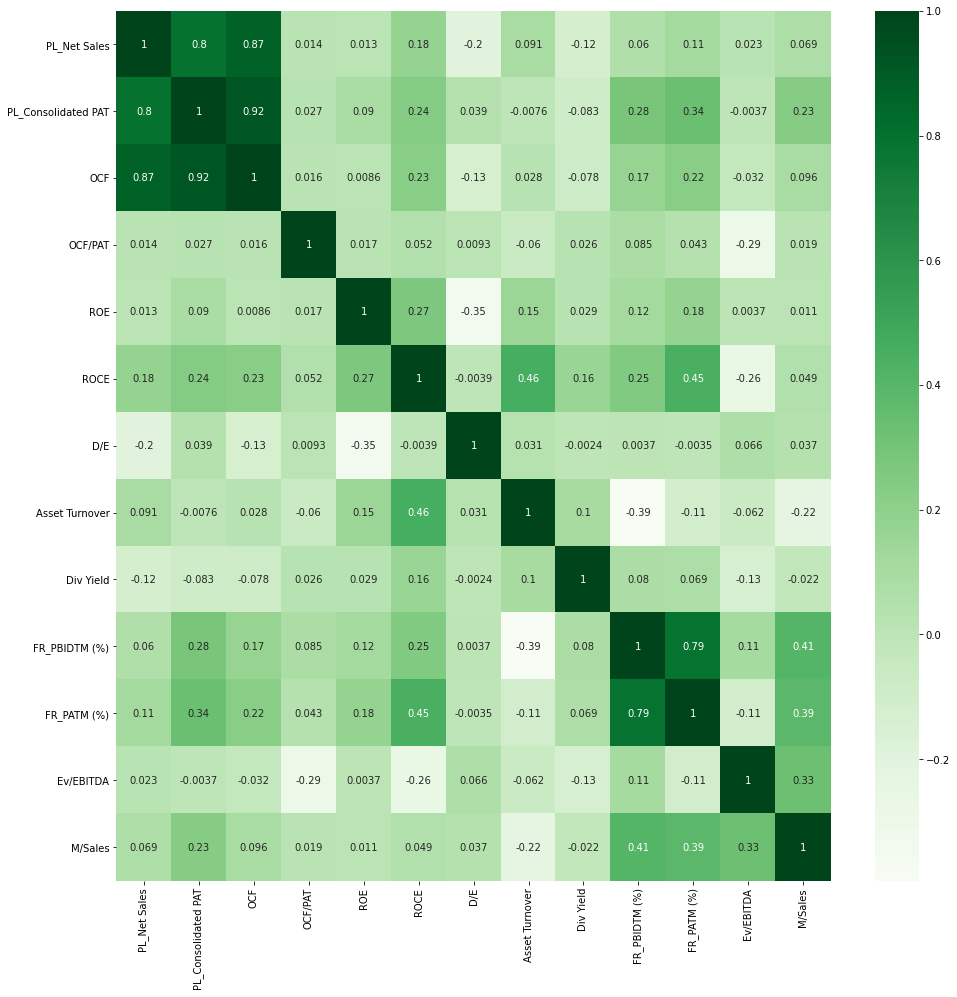

In [29]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [30]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['OCF/PAT', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)',
       'Ev/EBITDA', 'M/Sales'],
      dtype='object')

In [31]:
X,y = data1[['OCF/PAT', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)']], data1['Ev/EBITDA']

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [34]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [35]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 15.69065
 1 XGBRegressor            14.66629
 2 RidgeCV                 14.29593
 3 BayesianRidge           14.93832
 4 ARDRegression           16.04343
 5 ElasticNetCV            15.69065
 6 LassoLarsCV             15.69065
 7 SVR                     15.93795


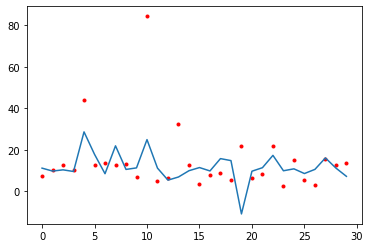

In [37]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[2])


In [ ]:
#data1['PE'].plot.kde()

# **M/Sales Prediction**

In [42]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [43]:
data2.head()

,Company Name,PL_Net Sales,PL_Consolidated PAT,OCF,OCF/PAT,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),M/Sales
0,3I Infotech Ltd.,2449.0,294.0,342.0,1.16,25.77,13.29,1.930000,0.63,1.91000,21.30,10.86,0.49
1,3M India Ltd.,1087.0,93.0,106.0,1.14,23.55,35.88,0.283302,2.08,1.92618,14.17,8.31,2.32
2,ABB India Ltd.,6237.0,355.0,354.0,1.00,15.71,25.33,0.283302,1.18,0.26000,9.55,5.46,2.38
3,Accelya Solutions India Ltd.,166.0,26.0,28.0,1.08,24.02,25.64,0.040000,1.11,2.28000,24.76,15.92,0.57
4,Aegis Logistics Ltd.,305.0,43.0,33.0,0.76,24.55,22.50,0.690000,0.83,2.62000,25.93,14.09,0.92


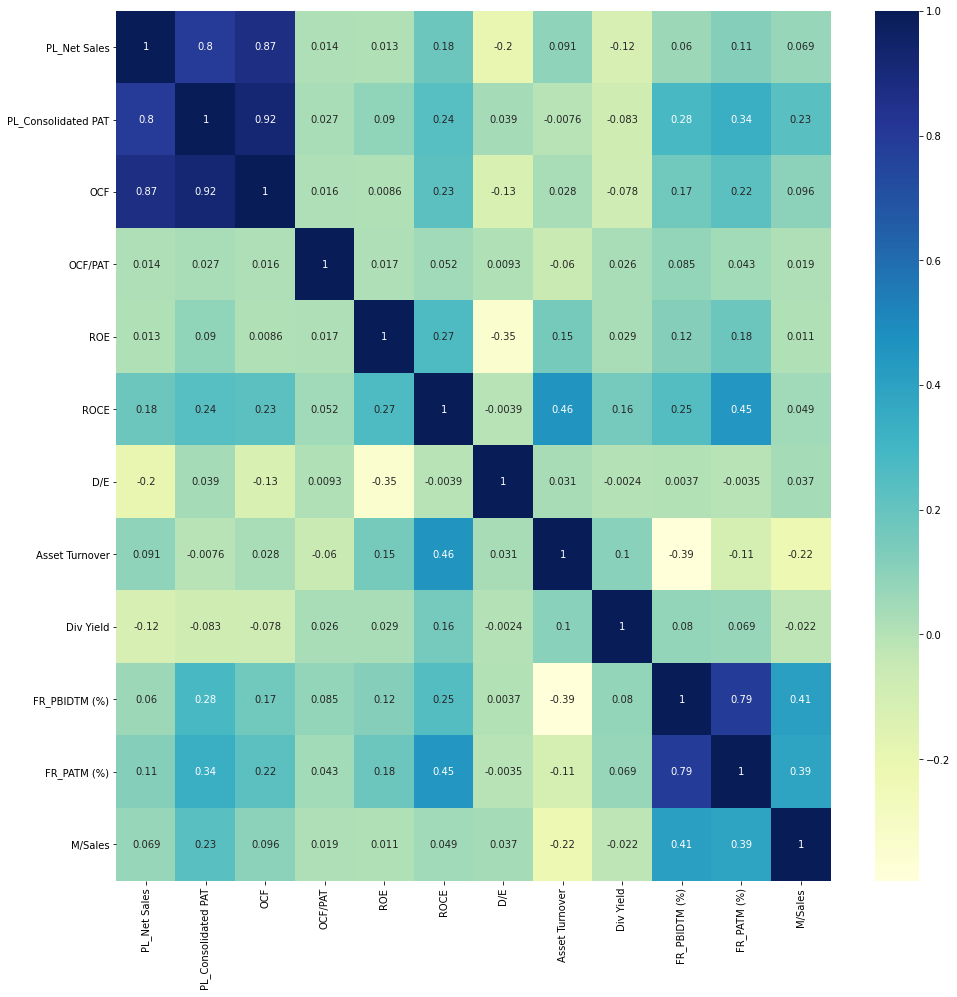

In [44]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [50]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.09]
relevant_features.index

Index(['PL_Consolidated PAT', 'OCF', 'Asset Turnover', 'FR_PBIDTM (%)',
       'FR_PATM (%)', 'M/Sales'],
      dtype='object')

In [53]:
X,y = data2[['PL_Consolidated PAT', 'OCF', 'Asset Turnover', 'FR_PBIDTM (%)',
       'FR_PATM (%)']], data2['M/Sales']

In [54]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [56]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [57]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 7.4764217454
 1 XGBRegressor            10.6254941951
 2 RidgeCV                 12.5170657582
 3 BayesianRidge           10.6416053532
 4 ARDRegression           9.9495405441
 5 ElasticNetCV            7.2657845341
 6 LassoLarsCV             7.4764217454
 7 SVR                     4.2805774707


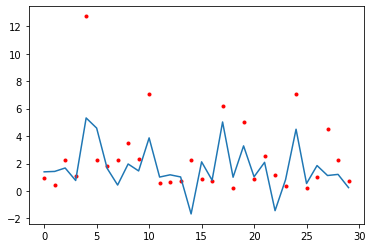

In [59]:
#plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
#plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[7])
